In [ ]:
# a partir de matriz tf idf
# crear string para cada fila de las palabras que aparecen.
# juntar ese string en un mismo df con el df de mails y news
#hacer visualizacion pre y post procesamiento (histogramas del numero de palabras)

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import find

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
news_tfidf = pd.read_csv(r"D:\TFG\tfg_git\data\tf_idf\news_processed_tfidf.csv")
mails_tfidf = pd.read_csv(r"D:\TFG\tfg_git\data\tf_idf\mails_processed_tfidf.csv")

In [3]:
print(news_tfidf.shape)
print(mails_tfidf.shape)

(26501, 4218)
(668, 4218)


In [13]:
news_tfidf.iloc[1]

aaron          0.0
abc            0.0
abc_news       0.0
ability        0.0
abortion       0.0
              ... 
young_voter    0.0
youth          0.0
youtube        0.0
zealand        0.0
zone           0.0
Name: 1, Length: 4218, dtype: float64

In [14]:

feature_names = news_tfidf.columns.tolist()

# loop through each row of the matrix and create a list of words for that row
word_lists = []
for row in range(news_tfidf.shape[0]):
    # get the indices of the non-zero elements in the row
    _, col_indices, _ = find(news_tfidf.iloc[row])
    # create a list of words for the row
    words = [feature_names[col] for col in col_indices]
    word_lists.append(words)

word_lists_news = word_lists

In [21]:

feature_names = mails_tfidf.columns.tolist()

# loop through each row of the matrix and create a list of words for that row
word_lists = []
for row in range(mails_tfidf.shape[0]):
    # get the indices of the non-zero elements in the row
    _, col_indices, _ = find(mails_tfidf.iloc[row])
    # create a list of words for the row
    words = [feature_names[col] for col in col_indices]
    word_lists.append(words)

word_lists_mails = word_lists

In [22]:
print(len(word_lists_news))
print(len(word_lists_mails))

26501
668


In [23]:
# load preprocessing data
news_preprocessed = pd.read_csv(r"D:\TFG\tfg_git\data\news\news3_v2.csv")
mails_preprocessed = pd.read_csv(r"D:\TFG\tfg_git\data\mails\corpus_v2.0.csv")

In [31]:
len_news_orig = []
len_news_processed = []
for i in range(len(word_lists_news)): 
    len_news_orig.append(len(news_preprocessed["clean_text"][i].split()))
    len_news_processed.append(len(word_lists_news[i]))

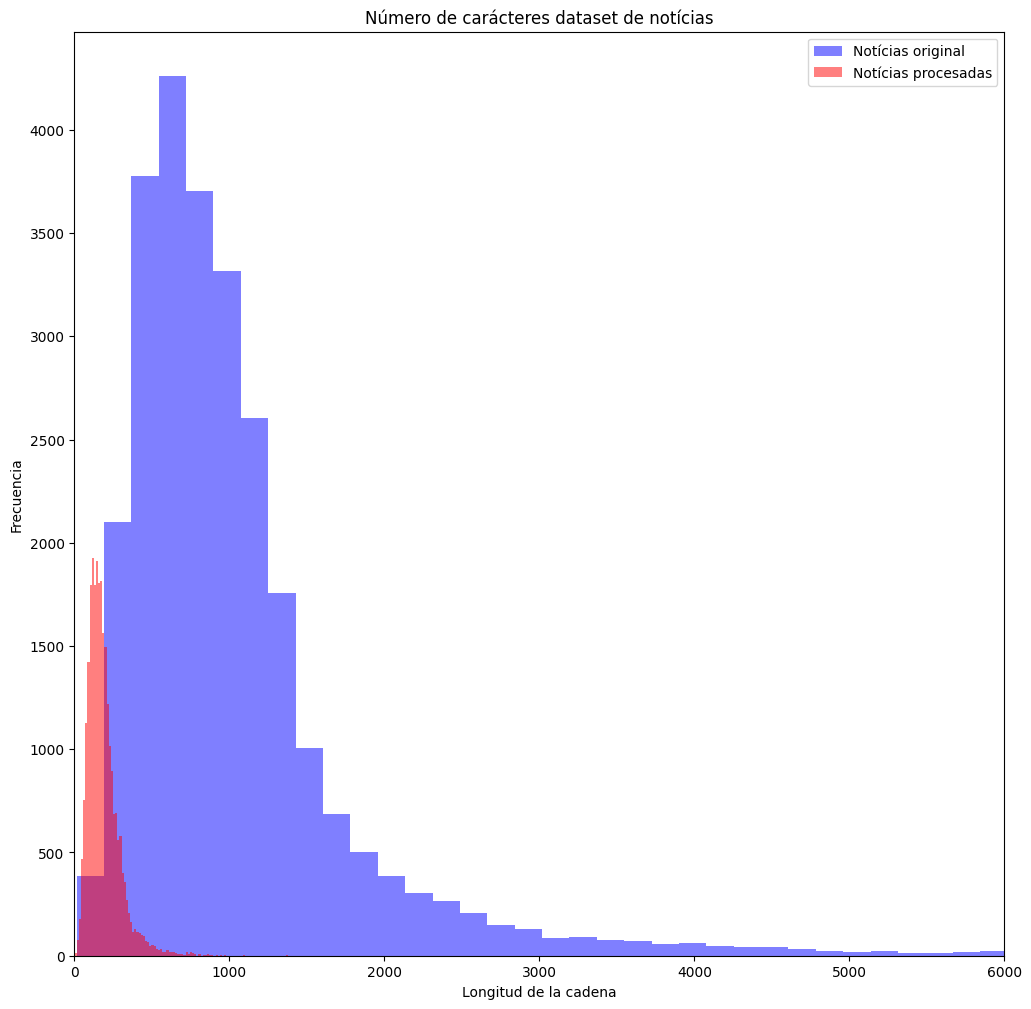

In [41]:
# crear figura y subplot
fig, ax = plt.subplots(figsize=(12, 12))

# trazar el primer histograma
ax.hist(len_news_orig, bins=100, alpha=0.5, label='Notícias original', color='b', histtype='stepfilled')

# trazar el segundo histograma
ax.hist(len_news_processed, bins=100, alpha=0.5, label='Notícias procesadas', color='r', histtype='stepfilled')

# ajustar las etiquetas y títulos
ax.set_xlabel('Longitud de la cadena')
ax.set_ylabel('Frecuencia')
ax.set_title('Número de carácteres dataset de notícias')
# establecer límites y ajustar las marcas de graduación en el eje x
# establecer límites y ajustar las marcas de graduación en el eje x
ax.set_xlim(0, 6000)
# agregar leyenda
ax.legend()

# mostrar el gráfico
plt.show()

In [42]:
len_mails_orig = []
len_mails_processed = []
for i in range(len(word_lists_mails)): 
    len_mails_orig.append(len(mails_preprocessed["clean_text"][i].split()))
    len_mails_processed.append(len(word_lists_mails[i]))

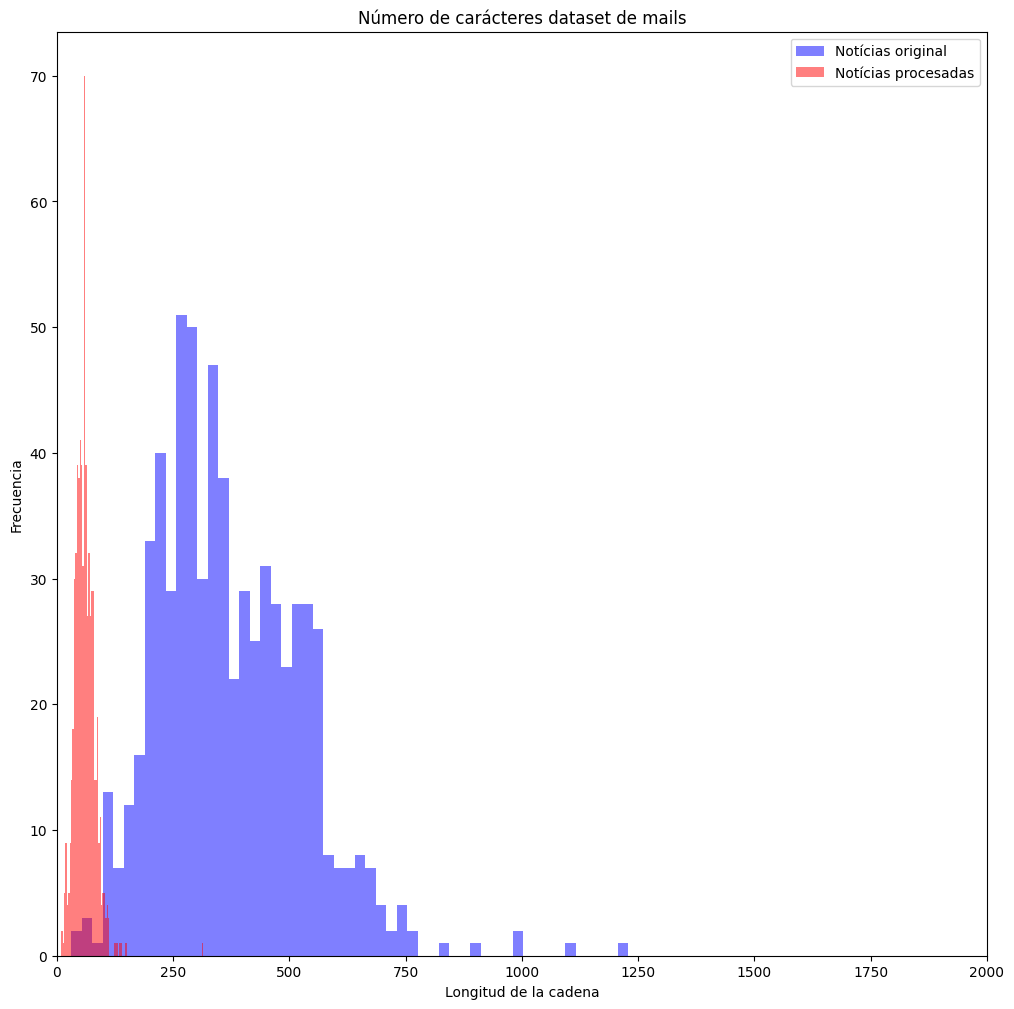

In [44]:
# crear figura y subplot
fig, ax = plt.subplots(figsize=(12, 12))

# trazar el primer histograma
ax.hist(len_mails_orig, bins=100, alpha=0.5, label='Notícias original', color='b', histtype='stepfilled')

# trazar el segundo histograma
ax.hist(len_mails_processed, bins=100, alpha=0.5, label='Notícias procesadas', color='r', histtype='stepfilled')

# ajustar las etiquetas y títulos
ax.set_xlabel('Longitud de la cadena')
ax.set_ylabel('Frecuencia')
ax.set_title('Número de carácteres dataset de mails')
# establecer límites y ajustar las marcas de graduación en el eje x
# establecer límites y ajustar las marcas de graduación en el eje x
ax.set_xlim(0, 2000)
# agregar leyenda
ax.legend()

# mostrar el gráfico
plt.show()